# Exercise 4 - Hodgkin & Huxley Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib import rcParams
% matplotlib inline

## Equations

### Constants

In [2]:
C_m = 1 #membrane capacitance, in uF/cm^2

g_Na = 120.0 #maximum conducances, in mS/cm^2
g_K  = 36.0
g_L  = 0.3

V_Na = 115 #Nernst reversal potentials, in mV
V_K  = -12
V_L  = 10.6
V_rest = -70


### Rate equations V in mV:
non-linear paramiters alfa and beta

In [3]:
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u ) - 1)
def alpha_h(u): return (0.07 * np.exp(-u / 20))

def beta_m(u):  return 4 * np.exp((-u) / 18)
def beta_n(u):  return 0.125 * np.exp((-u) / 80)
def beta_h(u):  return 1 / (np.exp(3 - 0.1 * u) + 1)

### Temperature correction

In [4]:
def temp_corr(T): return 3**(0.1*(T-6.3))  

## Time Constants and Steady State Values

### Time constants
τx(u)=[αx(u)+βx(u)] ^ −1

In [5]:
def tau_m(u): return (alpha_m(u) + beta_m(u))**(-1)
def tau_n(u): return (alpha_n(u) + beta_n(u))**(-1)
def tau_h(u): return (alpha_h(u) + beta_h(u))**(-1)

### Calculate time constants, for two temperature conditions

In [6]:
V = np.linspace(-100, 100, 1000)
temp1 = temp_corr(6.3)
Tau_M_6 = tau_m(V) / temp1
Tau_N_6 = tau_n(V) / temp1
Tau_H_6 = tau_h(V) / temp1

temp2 = temp_corr(28)
Tau_M_28 = tau_m(V) / temp2
Tau_N_28 = tau_n(V) / temp2
Tau_H_28 = tau_h(V) / temp2


### Plot time constans for two temp

In [7]:
rcParams.update({'font.size': 22})

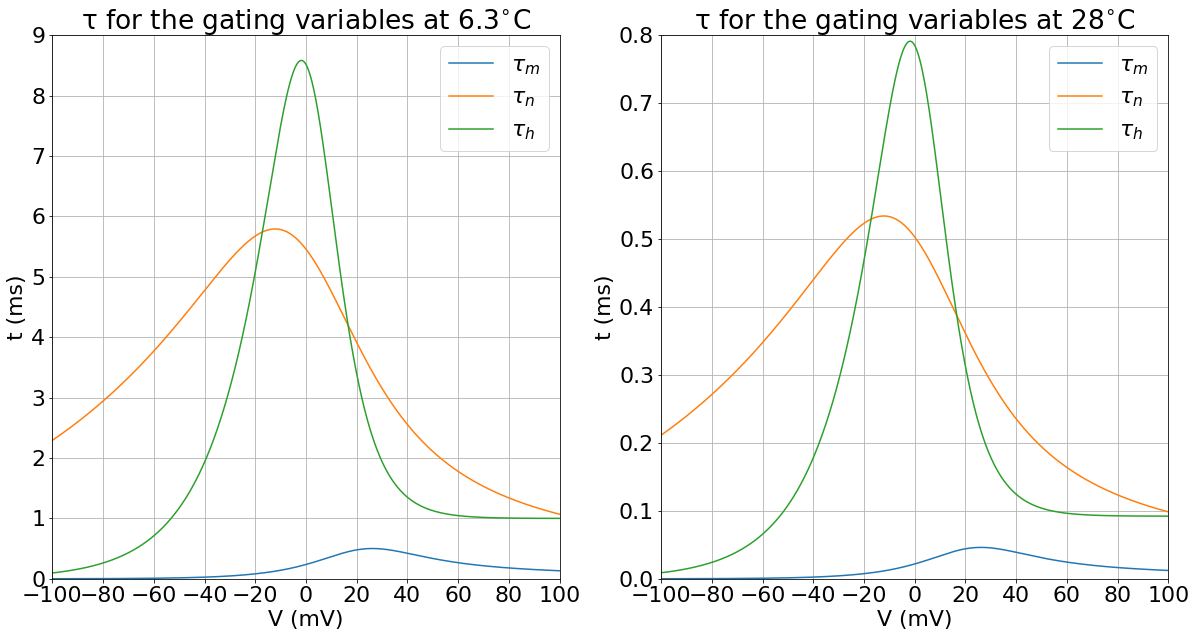

In [8]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10));
ax[0].set_xlabel('V (mV)')
ax[0].set_ylabel('t (ms)')
ax[0].grid()
ax[0].set_xlim(-100, 100)
ax[0].set_ylim(0, 9)
ax[0].set_yticks(np.arange(0, 10, 1));
ax[0].set_xticks(np.arange(-100, 101, 20));
plt0, = ax[0].plot(V, Tau_M_6, label='$τ_m$');
plt1, = ax[0].plot(V, Tau_N_6, label='$τ_n$');
plt2, = ax[0].plot(V, Tau_H_6, label='$τ_h$');
ax[0].legend(loc=1, handles=[plt0, plt1, plt2])

ax[0].set_title('τ for the gating variables at 6.3$^{\circ}$C')
ax[1].set_title('τ for the gating variables at 28$^{\circ}$C')

ax[1].set_xlabel('V (mV)')

ax[1].set_ylabel('t (ms)')
ax[1].grid()
ax[1].set_xlim(-100, 100)
ax[1].set_ylim(0, 0.8)
ax[1].set_yticks(np.arange(0, 0.9, .1));
ax[1].set_xticks(np.arange(-100, 101, 20));

plt10, = ax[1].plot(V, Tau_M_28, label='$τ_m$');
plt11, = ax[1].plot(V, Tau_N_28, label='$τ_n$');
plt12, = ax[1].plot(V, Tau_H_28, label='$τ_h$');
ax[1].legend(loc=1, handles=[plt10, plt11, plt12])
plt.savefig('report/1_1.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

In [9]:
def m_ss(u): return alpha_m(u) / (alpha_m(u) + beta_m(u))
def n_ss(u): return alpha_n(u) / (alpha_n(u) + beta_n(u))
def h_ss(u): return alpha_h(u) / (alpha_h(u) + beta_h(u))

In [10]:
V = np.linspace(-100, 100, 1000)
M_6 = m_ss(V)
N_6 = n_ss(V)
H_6 = h_ss(V)

M_28 = m_ss(V) 
N_28 = n_ss(V) 
H_28 = h_ss(V) 

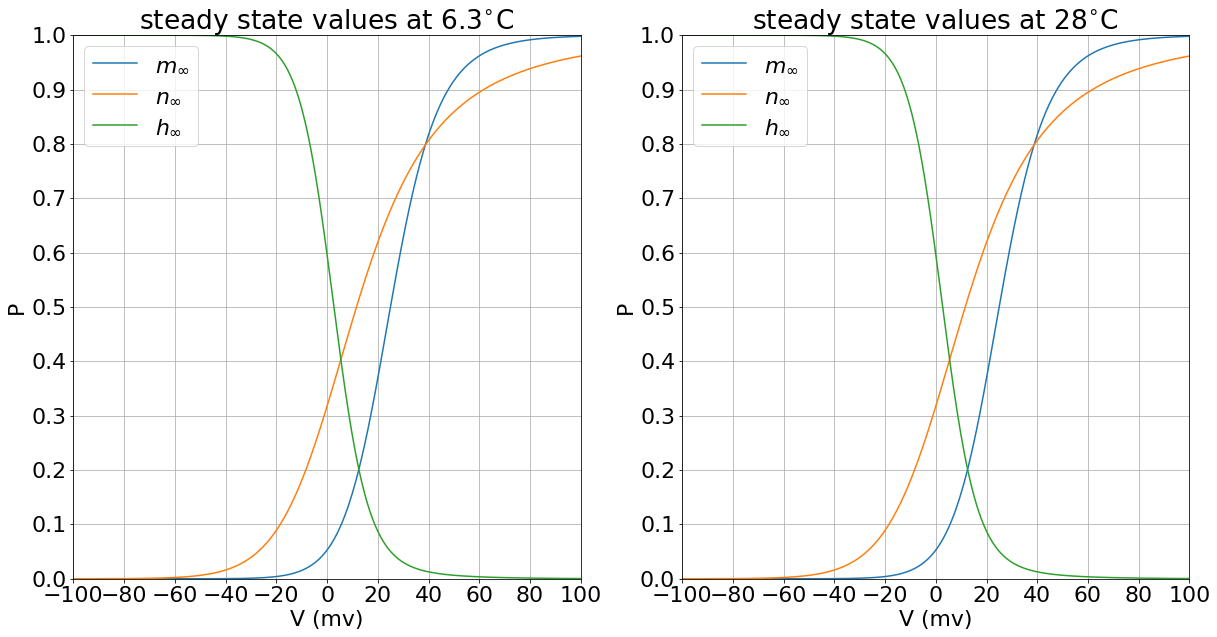

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10));
ax[0].set_ylabel('P')
ax[0].set_xlabel('V (mv)')
ax[0].grid()
ax[0].set_xlim(-100, 100)
ax[0].set_ylim(0, 1)
ax[0].set_yticks(np.arange(0, 1.1, .1));
ax[0].set_xticks(np.arange(-100, 101, 20));

plt0, = ax[0].plot(V, M_6, label='$m_{\infty}$');
plt1, = ax[0].plot(V, N_6, label='$n_{\infty}$');
plt2, = ax[0].plot(V, H_6, label='$h_{\infty}$');
ax[0].legend(loc=2, handles=[plt0, plt1, plt2])

ax[0].set_title('steady state values at 6.3$^{\circ}$C')
ax[1].set_title('steady state values at 28$^{\circ}$C')

ax[1].set_ylabel('P')
ax[1].set_xlabel('V (mv)')
ax[1].grid()
ax[1].set_xlim(-100, 100)
ax[1].set_ylim(0, 1)
ax[1].set_yticks(np.arange(0, 1.1, .1));
ax[1].set_xticks(np.arange(-100, 101, 20));
plt0, = ax[1].plot(V, M_28, label='$m_{\infty}$');
plt1, = ax[1].plot(V, N_28, label='$n_{\infty}$');
plt2, = ax[1].plot(V, H_28, label='$h_{\infty}$');
ax[1].legend(loc=2, handles=[plt0, plt1, plt2])
plt.savefig('report/1_2.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

## Hodgkin & Huxley Neuro Model
implement a function that calculates the ionic current density i_ion, 
use the exponential-euler solver



### Ionic currents

In [12]:
def I_Na_f(u, m, h): return g_Na * (m**3 * h) * (u - V_Na)  #sodium channel
def I_K_f (u, n   ): return g_K  * (n**4    ) * (u - V_K)   #potas
def I_L_f (u      ): return g_L               * (u - V_L)

def i_ion(I_Na, I_K, I_L): return I_Na + I_K + I_L
def dv_dt(i_ion, i_stim): return 1/c * (-i_ion + i_stimulus)

In [13]:
def temp_corr(T): return 3**(0.1*(T-6.3))  

def dm_du(m, u): return alpha_m(u) * (1 - m) - beta_m(u) * m
def dn_du(n, u): return alpha_n(u) * (1 - n) - beta_n(u) * n
def dh_du(h, u): return alpha_h(u) * (1 - h) - beta_h(u) * h

# C_m = 1 * 10e-6
def du_du(u, m, n, h, I,): return (I_Na_f(u, m, h) + I_K_f(u, n) + I_L_f(u) - I)/ -C_m
def dv_dt(u, m, n, h, I,): return 1/C_m * [I_Na(u, m, h) + I_K(u, n) + I_L(u)]

## Test

In [15]:
def hh_model_exp2(temp, T, dt, I):
    t = np.linspace(0, T, int(T/dt))
    M = np.zeros_like(t)
    N = np.zeros_like(t)
    H = np.zeros_like(t)
    U = np.zeros_like(t)
    
    INa = np.zeros_like(t)
    IK  = np.zeros_like(t)
    IL  = np.zeros_like(t)
    
    M[0], N[0], H[0] = m_ss(0), n_ss(0), h_ss(0)
    U[0] = 0
    k = temp_corr(temp)
    
    for n in range(0, len(I)-1):
        u = U[n]
        A_m = -1 * k * (alpha_m(u) + beta_m(u))
        A_n = -1 * k * (alpha_n(u) + beta_n(u))
        A_h = -1 * k * (alpha_h(u) + beta_h(u))
        B_m = k * alpha_m(u)
        B_n = k * alpha_n(u)
        B_h = k * alpha_h(u)
      
        INa[n] = g_Na * (M[n]**3 * H[n]) * (u - V_Na)  #sodium channel
        IK[n]  = g_K  * (N[n]**4       ) * (u - V_K)   #potas
        IL[n]  = g_L                     * (u - V_L)

        M[n+1] = M[n] * np.exp(A_m * dt) + B_m/A_m * (np.exp(A_m * dt)-1)
        N[n+1] = N[n] * np.exp(A_n * dt) + B_n/A_n * (np.exp(A_n * dt)-1)
        H[n+1] = H[n] * np.exp(A_h * dt) + B_h/A_h * (np.exp(A_h * dt)-1)
        
        U[n+1] = U[n] + du_du(U[n], M[n+1], N[n+1], H[n+1], I[n]) * dt
#     return U, M, N, H
    return U, M, N, H, INa, IK, IL

## Implementation with hh_current

In [16]:
def hh_current(M, N, H, u):
    INa = g_Na * (M**3 * H) * (u - V_Na)  #sodium channel
    IK  = g_K  * (N**4    ) * (u - V_K)   #potas
    IL  = g_L               * (u - V_L)

    return INa + IK + IL

In [27]:
def hh_model_exp_nocurrent(temp, T, dt, I):
    t = np.linspace(0, T, int(T/dt))
    M = np.zeros_like(t)
    N = np.zeros_like(t)
    H = np.zeros_like(t)
    U = np.zeros_like(t)
    
    INa = np.zeros_like(t)
    IK  = np.zeros_like(t)
    IL  = np.zeros_like(t)
    
    M[0], N[0], H[0] = m_ss(0), n_ss(0), h_ss(0)
    U[0] = 0
    k = temp_corr(temp)
    
    for n in range(0, len(I)-1):
        u = U[n]
        A_m = -1 * k * (alpha_m(u) + beta_m(u))
        A_n = -1 * k * (alpha_n(u) + beta_n(u))
        A_h = -1 * k * (alpha_h(u) + beta_h(u))
        B_m = k * alpha_m(u)
        B_n = k * alpha_n(u)
        B_h = k * alpha_h(u)
      
        M[n+1] = M[n] * np.exp(A_m * dt) + B_m/A_m * (np.exp(A_m * dt)-1)
        N[n+1] = N[n] * np.exp(A_n * dt) + B_n/A_n * (np.exp(A_n * dt)-1)
        H[n+1] = H[n] * np.exp(A_h * dt) + B_h/A_h * (np.exp(A_h * dt)-1)
        
        I_ion = hh_current(M[n+1], N[n+1], H[n+1], u)
        
        U[n+1] = U[n] - 1/C_m * (I_ion - I[n]) * dt
    return U, M, N, H

### Exponential Euler Solver

## Current Input

In [18]:
l = 100/0.01
t = np.linspace(0, 100, int(l))
I1 = np.repeat(0, int(l))

I1[0:499] = 1
I1[1499:2000] = 2
I1[3000:3499] = 3
I1[4499:5000] = 4
I1[6000:6499] = 5

I2 = np.repeat(0, int(l))
I2[0:499] = 2
I2[1499:2000] = 4
I2[3000:3499] = 8
I2[4499:5000] = 16
I2[6000:6499] = 32


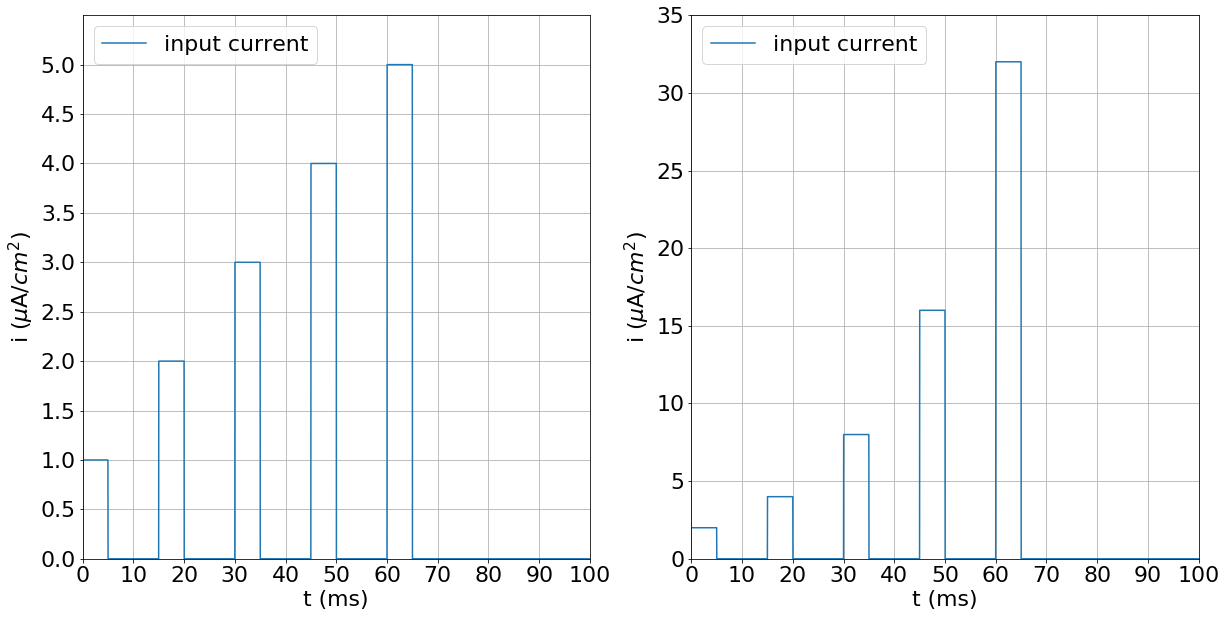

In [19]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10));
ax[0].set_ylabel('i ($\mu$A/$cm^2$)')
ax[0].set_xlabel('t (ms)')
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 5.5)
ax[0].set_yticks(np.arange(0, 5.5, .5));
ax[0].set_xticks(np.arange(0, 101, 10));
ax[0].grid()
ax[0].plot(t, I1, label='input current');
ax[0].legend(loc=2)

ax[1].set_ylabel('i ($\mu$A/$cm^2$)')
ax[1].set_xlabel('t (ms)')
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 35)
ax[1].set_yticks(np.arange(0, 36,5));
ax[1].set_xticks(np.arange(0, 101, 10));
ax[1].grid()
ax[1].plot(t, I2, label='input current');
ax[1].legend(loc=2)
plt.savefig('report/2.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

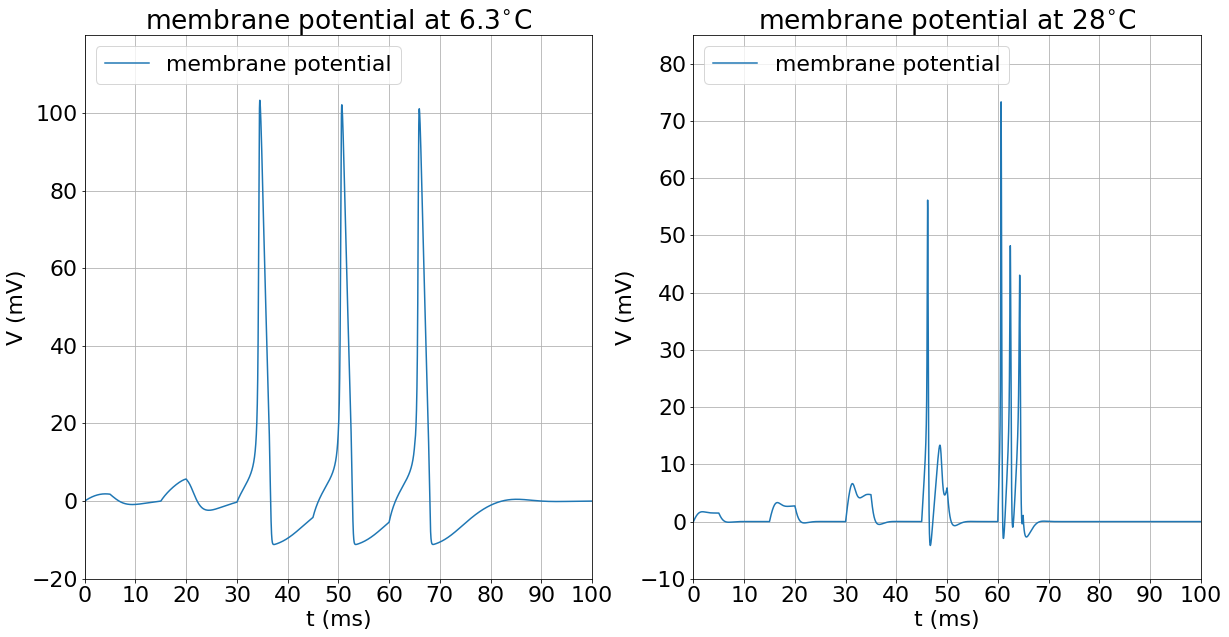

In [20]:
U1, M1, N1, H1, I_Na1, I_K1, I_L1 = hh_model_exp(6.3, 100, 0.01, I1)
U2, M2, N2, H2, I_Na2, I_K2, I_L2 = hh_model_exp(28, 100, 0.01, I2)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10));
ax[0].grid()
ax[0].set_ylabel('V (mV)')
ax[0].set_xlabel('t (ms)')
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(0, 101, 10));
ax[0].set_ylim(-20, 120)
ax[0].set_yticks(np.arange(-20, 120, 20));
ax[0].plot(t, U1, label='membrane potential');
ax[0].legend(loc=2)


ax[0].set_title('membrane potential at 6.3$^{\circ}$C')
ax[1].set_title('membrane potential at 28$^{\circ}$C')


ax[1].set_ylabel('V (mV)')
ax[1].set_xlabel('t (ms)')
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(0, 101, 10));
ax[1].set_ylim(-10, 85)
ax[1].set_yticks(np.arange(-10, 85, 10))
ax[1].grid()
ax[1].plot(t, U2, label='membrane potential');
ax[1].legend(loc=2)
plt.savefig('report/3.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

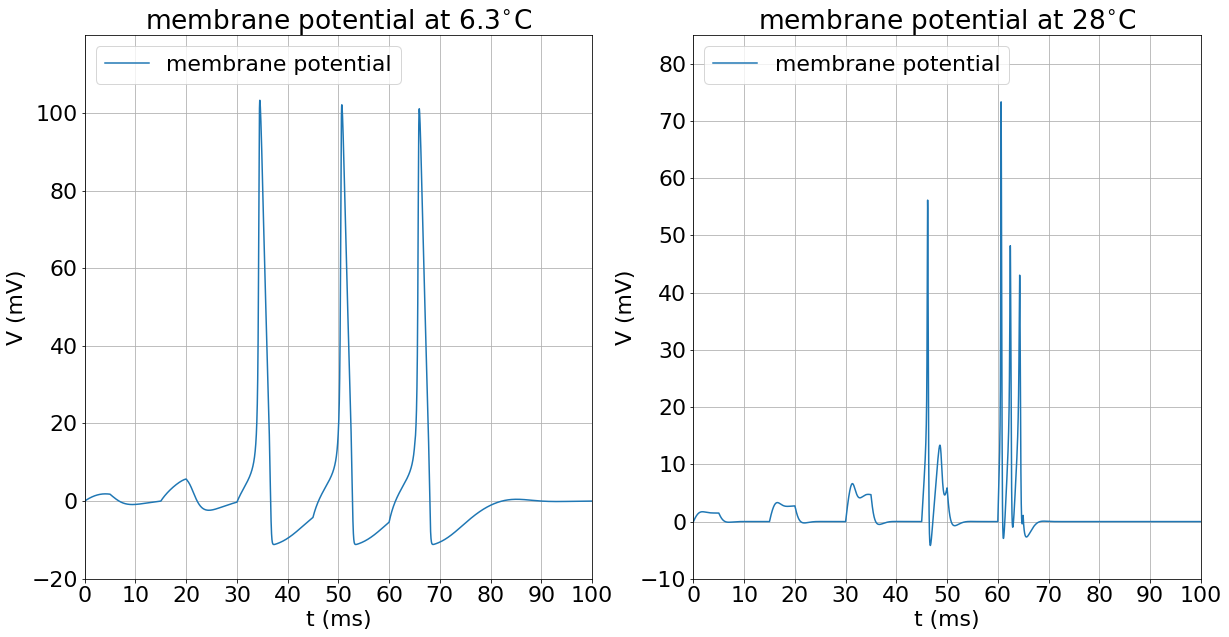

In [28]:
U1, M1, N1, H1 = hh_model_exp_nocurrent(6.3, 100, 0.01, I1)
U2, M2, N2, H2 = hh_model_exp_nocurrent(28, 100, 0.01, I2)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10));
ax[0].grid()
ax[0].set_ylabel('V (mV)')
ax[0].set_xlabel('t (ms)')
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(0, 101, 10));
ax[0].set_ylim(-20, 120)
ax[0].set_yticks(np.arange(-20, 120, 20));
ax[0].plot(t, U1, label='membrane potential');
ax[0].legend(loc=2)


ax[0].set_title('membrane potential at 6.3$^{\circ}$C')
ax[1].set_title('membrane potential at 28$^{\circ}$C')


ax[1].set_ylabel('V (mV)')
ax[1].set_xlabel('t (ms)')
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(0, 101, 10));
ax[1].set_ylim(-10, 85)
ax[1].set_yticks(np.arange(-10, 85, 10))
ax[1].grid()
ax[1].plot(t, U2, label='membrane potential');
ax[1].legend(loc=2)
plt.savefig('report/3.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

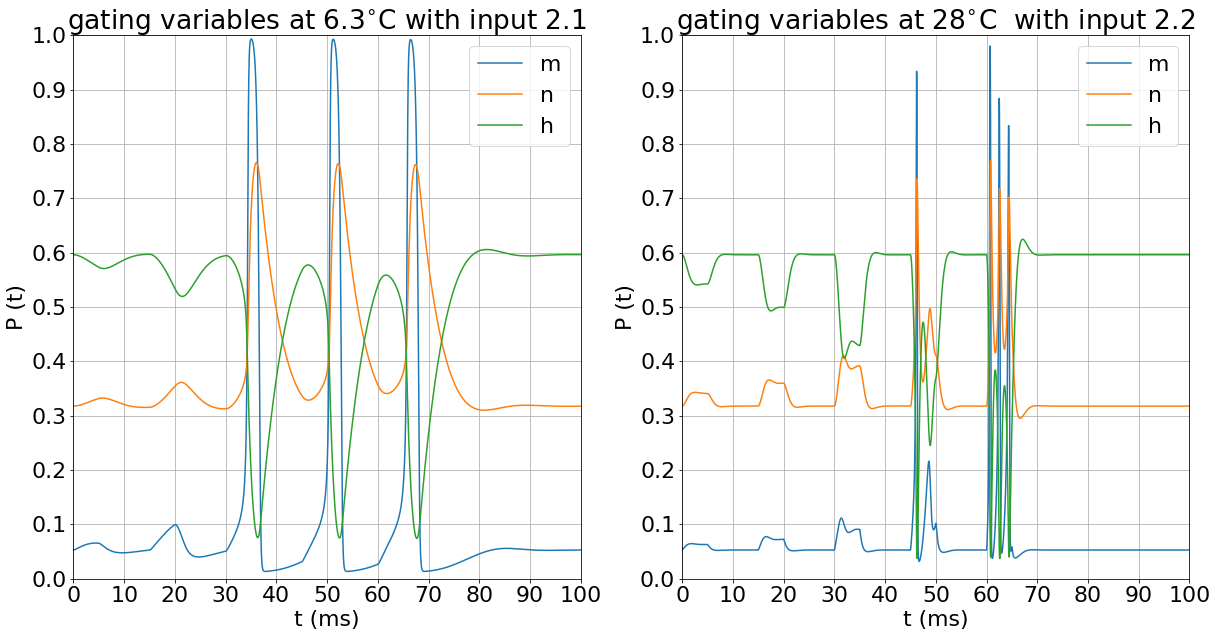

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10));
ax[0].grid()
ax[0].set_ylabel('P (t)')
ax[0].set_xlabel('t (ms)')
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(0, 101, 10));
ax[0].set_ylim(0, 1)
ax[0].set_yticks(np.arange(0, 1.1, 0.1));

plt0, = ax[0].plot(t, M1, label='m');
plt1, = ax[0].plot(t, N1, label='n');
plt2, = ax[0].plot(t, H1, label='h');
ax[0].legend(loc=1, handles=[plt0, plt1, plt2])

ax[0].set_title('gating variables at 6.3$^{\circ}$C with input 2.1')
ax[1].set_title('gating variables at 28$^{\circ}$C  with input 2.2')


ax[1].grid()
ax[1].set_ylabel('P (t)')
ax[1].set_xlabel('t (ms)')
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(0, 101, 10));
ax[1].set_ylim(0, 1)
ax[1].set_yticks(np.arange(0, 1.1, 0.1));

plt0, = ax[1].plot(t, M2, label='m');
plt1, = ax[1].plot(t, N2, label='n');
plt2, = ax[1].plot(t, H2, label='h');
ax[1].legend(loc=1, handles=[plt0, plt1, plt2])
plt.savefig('report/4.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

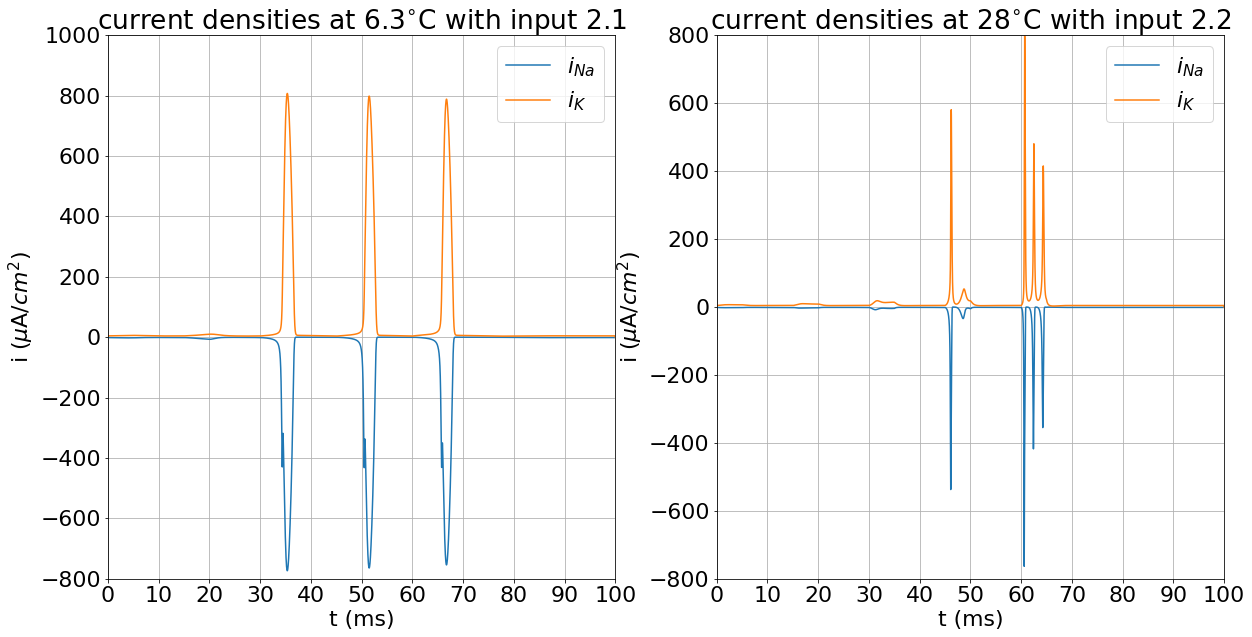

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10));
ax[0].grid()
ax[0].set_ylabel('i ($\mu$A/$cm^2$)')
ax[0].set_xlabel('t (ms)')
ax[0].set_xlim(0, 100)
ax[0].set_xticks(np.arange(0, 101, 10));
ax[0].set_ylim(-800, 1000)
ax[0].set_yticks(np.arange(-800, 1001, 200));

plt0, = ax[0].plot(t, I_Na1, label='$i_{Na}$');
plt1, = ax[0].plot(t, I_K1, label='$i_K$');
ax[0].legend(loc=1, handles=[plt0, plt1])

ax[0].set_title('current densities at 6.3$^{\circ}$C with input 2.1')
ax[1].set_title('current densities at 28$^{\circ}$C with input 2.2')


ax[1].set_ylabel('i ($\mu$A/$cm^2$)')
ax[1].set_xlabel('t (ms)')
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(0, 101, 10));
ax[1].set_ylim(-800, 800)
ax[1].set_yticks(np.arange(-800, 801, 200));
ax[1].grid()

plt0, = ax[1].plot(t, I_Na2, label='$i_{Na}$');
plt1, = ax[1].plot(t, I_K2, label='$i_K$');
ax[1].legend(loc=1, handles=[plt0, plt1])
plt.savefig('report/5.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)

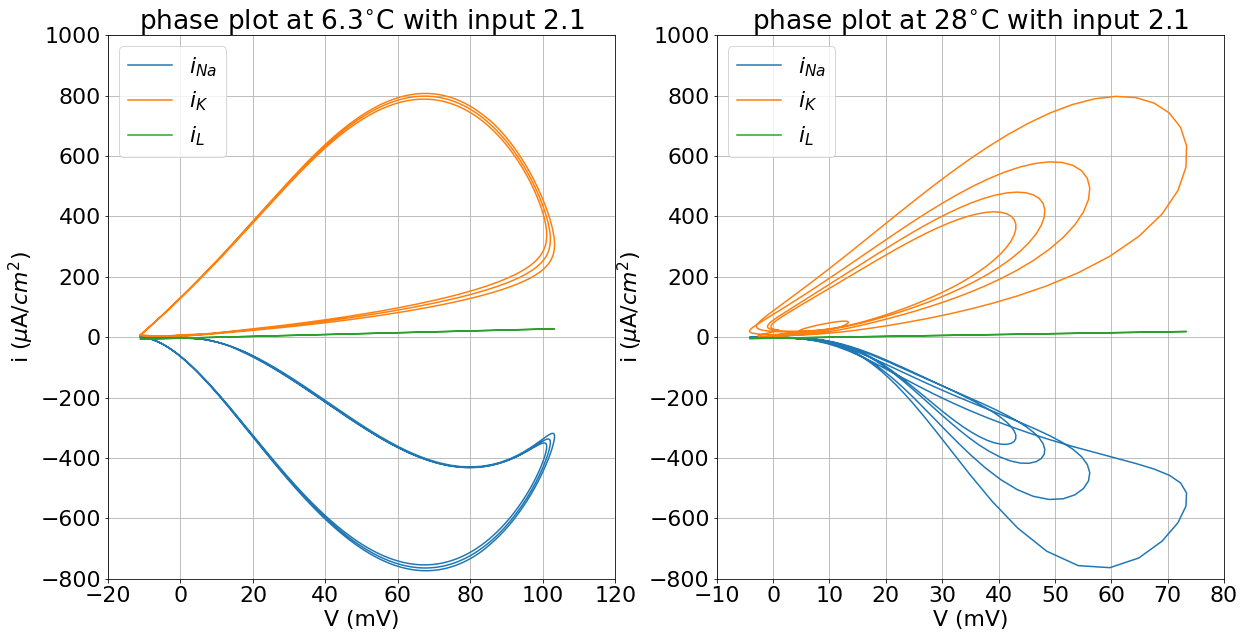

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10));
ax[0].set_ylabel('i ($\mu$A/$cm^2$)')
ax[0].set_xlabel('V (mV)')
ax[0].set_xlim(-20, 120)
ax[0].set_xticks(np.arange(-20, 121, 20));
ax[0].set_ylim(-800, 1000)
ax[0].set_yticks(np.arange(-800, 1001, 200));
ax[0].grid()

plt0, = ax[0].plot(U1, I_Na1, label='$i_{Na}$');
plt1, = ax[0].plot(U1, I_K1, label='$i_K$');
plt2, = ax[0].plot(U1, I_L1, label='$i_L$');
ax[0].legend(loc=2, handles=[plt0, plt1, plt2])

ax[0].set_title('phase plot at 6.3$^{\circ}$C with input 2.1')
ax[1].set_title('phase plot at 28$^{\circ}$C with input 2.1')


ax[1].set_ylabel('i ($\mu$A/$cm^2$)')
ax[1].set_xlabel('V (mV)')
ax[1].set_xlim(-10, 80)
ax[1].set_xticks(np.arange(-10, 81, 10));
ax[1].set_ylim(-800, 1000)
ax[1].set_yticks(np.arange(-800, 1001, 200));
ax[1].grid()
plt0, = ax[1].plot(U2, I_Na2, label='$i_{Na}$');
plt1, = ax[1].plot(U2, I_K2, label='$i_K$');
plt2, = ax[1].plot(U2, I_L2, label='$i_L$');
ax[1].legend(loc=2, handles=[plt0, plt1, plt2])
plt.savefig('report/6.png', dpi=200, bbox_inches='tight', transparent="True", pad_inches=0)